In [12]:
# In this notebook we will try to solve the prolem of overfitting by using L1 and L2 regularization technique.
import pandas as pd
import numpy as np
df = pd.read_csv("Melbourne_housing.csv")
df

C:\Users\mbagn\AppData\Local\Temp\ipykernel_8220\1626731011.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Melbourne_housing.csv")


,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.71800,144.87800,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.84590,144.95550,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.84500,144.95380,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.78180,145.01980,Northern Metropolitan,2211.0,Parkade,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Reservoir,18 Elinda Pl,3,u,SP,RW,30/09/2017,12.0,3073.0,3.0,...,NaN,105.0,1990.0,Darebin City Council,-37.69769,145.02332,Northern Metropolitan,21650.0,Parkade,475000.0
34853,Roxburgh Park,14 Stainsby Cr,4,h,S,Raine,30/09/2017,20.6,3064.0,4.0,...,NaN,225.0,1995.0,Hume City Council,-37.63665,144.92976,Northern Metropolitan,5833.0,Underground,591000.0
34854,Springvale South,8 Bellbird Ct,4,h,PI,Barry,30/09/2017,22.2,3172.0,4.0,...,534.0,152.0,1970.0,Greater Dandenong City Council,-37.97037,145.15449,South-Eastern Metropolitan,4054.0,Carport,NaN
34855,Springvale South,30 Waddington Cr,3,h,S,Harcourts,30/09/2017,22.2,3172.0,3.0,...,544.0,NaN,NaN,Greater Dandenong City Council,-37.97751,145.14813,South-Eastern Metropolitan,4054.0,Detached Garage,780500.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom        26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13760 non-null  object 
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Latitude       26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 18  Region

In [14]:
df.describe()

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,Propertycount,Price
count,34857.000000,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,15551.000000,26881.000000,26881.000000,34854.000000,2.724700e+04
mean,3.031012,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,1965.289885,-37.810634,145.001851,7572.888306,1.050173e+06
std,0.969933,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,37.328178,0.090279,0.120169,4428.090313,6.414671e+05
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000,8.500000e+04
25%,2.000000,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,1940.000000,-37.862950,144.933500,4385.000000,6.350000e+05
50%,3.000000,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,1970.000000,-37.807600,145.007800,6763.000000,8.700000e+05
75%,4.000000,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,2000.000000,-37.754100,145.071900,10412.000000,1.295000e+06
max,16.000000,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,2106.000000,-37.390200,145.526350,21650.000000,1.120000e+07


In [15]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom             15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       994
YearBuilt          160
CouncilArea         33
Latitude         13402
Longtitude       14524
Regionname           8
Propertycount      342
ParkingArea          8
Price             2871
dtype: int64

In [16]:

df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21097
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        3
ParkingArea          0
Price             7610
dtype: int64

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 1. Caricamento Dati
df = pd.read_csv("Melbourne_housing.csv")

# --- DATA CLEANING (Step precedenti) ---

# Pulizia Target
df.dropna(subset=['Price'], inplace=True)
df = df[df['Price'] != 0]

# Cancellazione colonne specifiche richieste
cols_specifiche = ["BuildingArea", "YearBuilt", "Latitude", "Longtitude", "Landsize"]
cols_presenti = [c for c in cols_specifiche if c in df.columns]
df.drop(columns=cols_presenti, inplace=True)

# Cancellazione colonne object tranne Suburb
cols_object = df.select_dtypes(include=['object']).columns.tolist()
cols_to_drop_obj = [col for col in cols_object if col != 'Suburb']
df.drop(columns=cols_to_drop_obj, inplace=True)

# Imputazione
cols_fill_zero = ['Car']
for col in cols_fill_zero:
    if col in df.columns:
        df[col] = df[col].fillna(0)

cols_fill_median = ['Bedroom', 'Bathroom']
for col in cols_fill_median:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Pulizia finale righe con NaN residui (es. Distance/Postcode)
df.dropna(inplace=True)

# --- NUOVO STEP: RIMOZIONE OUTLIER (Metodo IQR) ---

print(f"Shape prima del taglio outlier: {df.shape}")

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Definiamo i limiti (Lower e Upper fence)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtriamo il dataset
df_clean = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

print(f"Shape dopo il taglio outlier: {df_clean.shape}")
print(f"Righe rimosse: {df.shape[0] - df_clean.shape[0]}")

# --- PREPARAZIONE MODELLO ---

# 1. One-Hot Encoding su Suburb
df_ready = pd.get_dummies(df_clean, columns=['Suburb'], drop_first=True)

# 2. X e y
X = df_ready.drop('Price', axis=1)
y = df_ready['Price']

# 3. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- ELASTICNET ---

model = Ridge(alpha=1, random_state=42)
model.fit(X_train_scaled, y_train)

# --- VALUTAZIONE ---

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("-" * 30)
print("RISULTATI (Senza Outlier)")
print("-" * 30)
print(f"MSE:  {mse:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²:   {r2:.4f}")
print("-" * 30)

C:\Users\mbagn\AppData\Local\Temp\ipykernel_8220\1387428715.py:9: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Melbourne_housing.csv")


Shape prima del taglio outlier: (27244, 9)
Shape dopo il taglio outlier: (25966, 9)
Righe rimosse: 1278
------------------------------
RISULTATI (Senza Outlier)
------------------------------
MSE:  75,242,172,669.48
RMSE: 274,303.07
R²:   0.5960
------------------------------


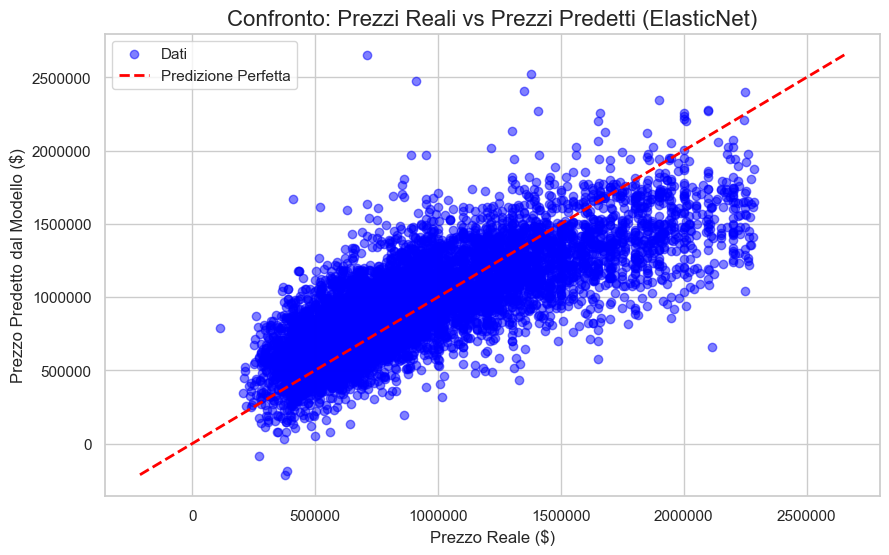

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Impostiamo uno stile grafico più leggibile
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# 1. Scatter plot dei dati
# alpha=0.5 rende i punti semitrasparenti per vedere dove si sovrappongono
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Dati')

# 2. Linea di riferimento (Perfect Prediction)
# Creiamo una linea che va dal minimo al massimo dei valori osservati
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Predizione Perfetta')

# 3. Etichette e Titolo
plt.title('Confronto: Prezzi Reali vs Prezzi Predetti (ElasticNet)', fontsize=16)
plt.xlabel('Prezzo Reale ($)', fontsize=12)
plt.ylabel('Prezzo Predetto dal Modello ($)', fontsize=12)
plt.legend()

# Formattazione assi per evitare la notazione scientifica (opzionale)
plt.ticklabel_format(style='plain', axis='both')

plt.show()

In [19]:
df.describe()

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Propertycount,Price
count,27244.000000,27244.000000,27244.000000,27244.000000,27244.000000,27244.000000,27244.000000,2.724400e+04
mean,2.992365,11.280634,3113.799479,3.035311,1.451732,1.285898,7566.781089,1.050210e+06
std,0.954810,6.787580,111.141993,0.834902,0.662012,1.137214,4492.382418,6.414923e+05
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,83.000000,8.500000e+04
25%,2.000000,6.400000,3046.000000,3.000000,1.000000,0.000000,4294.000000,6.350000e+05
50%,3.000000,10.500000,3088.000000,3.000000,1.000000,1.000000,6567.000000,8.700000e+05
75%,4.000000,14.000000,3153.000000,3.000000,2.000000,2.000000,10412.000000,1.295000e+06
max,16.000000,48.100000,3978.000000,20.000000,9.000000,18.000000,21650.000000,1.120000e+07


In [ ]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge


from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold


# --- 2. Configurazione del Modello ---
model = Ridge(alpha=1, random_state=42)

# --- 3.K-Fold ---
# Vogliamo 5 round di validazione.
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# --- 4. Esecuzione della Cross-Validation ---
scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

# --- Conversione in Positivo e Calcolo RMSE ---
mse_scores = -scores            # Togliamo il segno meno
rmse_scores = np.sqrt(mse_scores) # Facciamo la radice quadrata per avere l'errore 

print("\n--- Risultati Cross-Validation ---")
for i, mse in enumerate(mse_scores):
    print(f"Fold {i+1}: MSE = {mse:,.0f} | RMSE = {np.sqrt(mse):,.0f}")

print("-" * 40)
print(f"MSE Medio:  {mse_scores.mean():,.0f}")
print(f"RMSE Medio: {rmse_scores.mean():,.0f}") 
print(f"Stabilità (Std RMSE): +/- {rmse_scores.std():,.0f}")


--- Risultati Cross-Validation ---
Fold 1: MSE = 75,264,762,852 | RMSE = 274,344
Fold 2: MSE = 71,749,850,189 | RMSE = 267,862
Fold 3: MSE = 74,387,020,269 | RMSE = 272,740
Fold 4: MSE = 71,830,486,212 | RMSE = 268,012
Fold 5: MSE = 73,445,562,353 | RMSE = 271,008
----------------------------------------
MSE Medio:  73,335,536,375
RMSE Medio: 270,793
Stabilità (Std RMSE): +/- 2,560
